**TASK 2 : Part 1 :Training a CNN on the dataset of digits and alphabets(both lower case and upper case)**


Mounting drive and connecting colab to it to access the dataset.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Essential Imports


In [ ]:
import os
from pathlib import Path 
import shutil
from keras.preprocessing import image
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

Analysis of Directory and associated folders 


In [ ]:
p=Path("/content/drive/MyDrive/mnistpart1/train")

In [ ]:
dirs = p.glob("*")

In [ ]:
folders = os.listdir("/content/drive/MyDrive/mnistpart1/train")


Generating labels out of folders Name

In [ ]:
for f in dirs :
  print (f)
  label=str(f).split("\\")[-1][47:]
  print(label)

/content/drive/MyDrive/mnistpart1/train/Sample057
57
/content/drive/MyDrive/mnistpart1/train/Sample059
59
/content/drive/MyDrive/mnistpart1/train/Sample060
60
/content/drive/MyDrive/mnistpart1/train/Sample056
56
/content/drive/MyDrive/mnistpart1/train/Sample061
61
/content/drive/MyDrive/mnistpart1/train/Sample055
55
/content/drive/MyDrive/mnistpart1/train/Sample062
62
/content/drive/MyDrive/mnistpart1/train/Sample053
53
/content/drive/MyDrive/mnistpart1/train/Sample054
54
/content/drive/MyDrive/mnistpart1/train/Sample058
58
/content/drive/MyDrive/mnistpart1/train/Sample043
43
/content/drive/MyDrive/mnistpart1/train/Sample045
45
/content/drive/MyDrive/mnistpart1/train/Sample050
50
/content/drive/MyDrive/mnistpart1/train/Sample051
51
/content/drive/MyDrive/mnistpart1/train/Sample049
49
/content/drive/MyDrive/mnistpart1/train/Sample052
52
/content/drive/MyDrive/mnistpart1/train/Sample046
46
/content/drive/MyDrive/mnistpart1/train/Sample047
47
/content/drive/MyDrive/mnistpart1/train/Sample

In [ ]:
print(folders)

['Sample057', 'Sample059', 'Sample060', 'Sample056', 'Sample061', 'Sample055', 'Sample062', 'Sample053', 'Sample054', 'Sample058', 'Sample043', 'Sample045', 'Sample050', 'Sample051', 'Sample049', 'Sample052', 'Sample046', 'Sample047', 'Sample044', 'Sample048', 'Sample033', 'Sample038', 'Sample039', 'Sample035', 'Sample041', 'Sample036', 'Sample042', 'Sample037', 'Sample034', 'Sample040', 'Sample027', 'Sample025', 'Sample029', 'Sample030', 'Sample031', 'Sample024', 'Sample023', 'Sample032', 'Sample026', 'Sample028', 'Sample013', 'Sample019', 'Sample016', 'Sample014', 'Sample015', 'Sample021', 'Sample018', 'Sample022', 'Sample017', 'Sample020', 'Sample005', 'Sample003', 'Sample011', 'Sample009', 'Sample007', 'Sample012', 'Sample006', 'Sample008', 'Sample004', 'Sample010', 'Sample001', 'Sample002']


To know the number of images in each folder 

In [ ]:
for f in folders:
  path = "/content/drive/MyDrive/mnistpart1/train/" + f
  print(len(os.listdir(path)))

40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40


**Data Preprocessing**
**Steps are -**
1. Generating labels and converting to integer.
2. Used keras "image" module to load images and images to array conversion so as to feed these images to model.  
3. Converting to grayscale and reshaping to 28x28. 
> Grayscale conversion has been done because at the end I have to compare the results with the mnist dataset which is a grayscale images dataset with 28x28 dimensional images.Also with 900 x 1200 which is the actual size of image, this whole dataset cannot be fit into the RAM. Also a huge sparse array for each image got generated.
4. Normalisation by dividing by 255 such that pixel values come under the range of 0-1.   
5. Finally appending the processed images and labels to the list.

 

In [ ]:
images=[]
labels=[]

for folder_name in dirs :
  label=str(folder_name).split("\\")[-1][47:]
  print(label)
  label =int(label)

  for img_path in folder_name.glob("*.png"):
    labels.append(label)
    data1 = image.load_img(img_path , color_mode="grayscale" , target_size =(28,28))
    img_array = image.img_to_array(data1)/255.0

    images.append(img_array)
    
    

57
59
60
56
61
55
62
53
54
58
43
45
50
51
49
52
46
47
44
48
33
38
39
35
41
36
42
37
34
40
27
25
29
30
31
24
23
32
26
28
13
19
16
14
15
21
18
22
17
20
05
03
11
09
07
12
06
08
04
10
01
02


Saving the images and labels in numpy list in ".npy" file to be used in future without preprocessing 

In [ ]:
images = np.asarray(images)
labels =np.asarray(labels)

In [ ]:
print(images.shape  , labels.shape)

(2480, 28, 28, 1) (2480,)


In [ ]:
np.save('/content/drive/MyDrive/images_all_28_28.npy' , images)
np.save('/content/drive/MyDrive/labels_all_28_28.npy' , labels)

**Loading of the saved images and labels**






In [ ]:
import numpy as np
images = np.load("/content/drive/MyDrive/images_all_28_28.npy")
labels = np.load("/content/drive/MyDrive/labels_all_28_28.npy")

Shuffling the labels and images together so that model can learn features more heterogeneously.

In [ ]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [ ]:
s_images,s_labels= shuffle_in_unison(images, labels)

In [ ]:
s_images.shape

(2480, 28, 28, 1)

In [ ]:
s_labels

array([23, 32, 29, ..., 28, 44, 39])

In [ ]:
s_labels.shape

(2480,)

Labels need to be a one-hot encoded vector so as to feed to the CNN model   

In [ ]:
s_labels = to_categorical(s_labels)

One extra column of zeros has got added in the start, Thus deleting it. 
 

In [ ]:
print(s_labels.shape)

(2480, 63)


In [ ]:
print(s_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
s_labels =np.delete(s_labels,0,1)

In [ ]:
s_labels.shape

(2480, 62)

**Proposed Model**
> 1.Since the dataset contains digit and alphabets images unlike complex images, thus I focus to make a simple model od 3 hidden layers and a dense layer at the end with neurons = number of classes.

>2.Taken 28x28 shape because the original shape was shooting the parameters to hundred millions and leading to huge overfitting.  








In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape =(28,28,1)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation ='relu'  ))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,(3,3) , activation= 'relu' ))
model.add(MaxPool2D((2,2)))
 
model.add(Flatten())
model.add(Dense (62 ,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

**Final Compilation and Training**
> Compilation and checkpoint based on Validation Accuracy 

> Loss is taken as categorical_cross entropy because there are more than 2 classes.







In [ ]:
model.compile(optimizer='Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


In [ ]:
checkpoint = ModelCheckpoint("best_model1.h5" , monitor ='val_accuracy' ,verbose =0 , save_best_only =True , save_weights_only =False, mode='auto', period=1 )



Validation_split is taken as 0.1 because images are only 2480.
Descent number of epochs because the validation accuracy continues to increase after 20th epoch 

In [ ]:
hist = model.fit(s_images , s_labels,validation_split =0.1, epochs = 30 , batch_size=16,callbacks = [checkpoint])

Epoch 1/30
140/140 [==============================] - 4s 24ms/step - loss: 4.1303 - accuracy: 0.0112 - val_loss: 4.1190 - val_accuracy: 0.0363
Epoch 2/30
140/140 [==============================] - 3s 20ms/step - loss: 4.0732 - accuracy: 0.0411 - val_loss: 3.8133 - val_accuracy: 0.0806
Epoch 3/30
140/140 [==============================] - 3s 20ms/step - loss: 3.3672 - accuracy: 0.1520 - val_loss: 2.7562 - val_accuracy: 0.2581
Epoch 4/30
140/140 [==============================] - 3s 20ms/step - loss: 2.3588 - accuracy: 0.3490 - val_loss: 2.2838 - val_accuracy: 0.3427
Epoch 5/30
140/140 [==============================] - 3s 20ms/step - loss: 1.9470 - accuracy: 0.4560 - val_loss: 1.9611 - val_accuracy: 0.4355
Epoch 6/30
140/140 [==============================] - 3s 20ms/step - loss: 1.6771 - accuracy: 0.5027 - val_loss: 1.8053 - val_accuracy: 0.4798
Epoch 7/30
140/140 [==============================] - 3s 21ms/step - loss: 1.3793 - accuracy: 0.5942 - val_loss: 1.7258 - val_accuracy: 0.5081

**Visualisation**
> Plotting the results int terms of accuracy and losses 




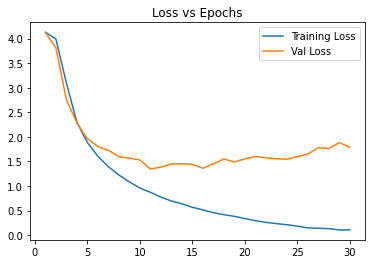

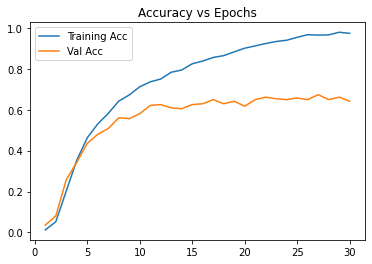

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()



plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

In [ ]:
model.evaluate(s_images, s_labels)

78/78 [==============================] - 1s 9ms/step - loss: 0.2647 - accuracy: 0.9464


[0.2647031843662262, 0.9463709592819214]